In [88]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

Import Data

In [67]:
mb_raw_data = pd.read_csv('../../data/mann_bruker.txt', sep="\t")
tw_raw_data = pd.read_csv('../../data/tenzer_waters.csv')

mb_clean = mb_raw_data[["CCS", "Ion mobility index", "Sequence"]]
del mb_raw_data

tw_clean = tw_raw_data[["sequence", "dt"]]
del tw_raw_data

Merge Datasets By Common Sequence

In [68]:
mb_clean = mb_clean.rename(columns={"Sequence": "sequence"})
merged_data = pd.merge(mb_clean, tw_clean, on="sequence")

#just use numeric columns
#numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
#merged_data = merged_data.select_dtypes(include=numerics)

Create Correlation Matrix

<Axes: >

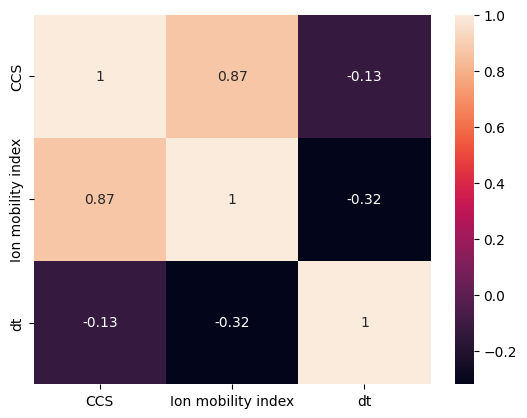

In [71]:
corr_matrix = merged_data[["CCS", "Ion mobility index", "dt"]].corr(method="spearman")

sn.heatmap(corr_matrix, annot=True)

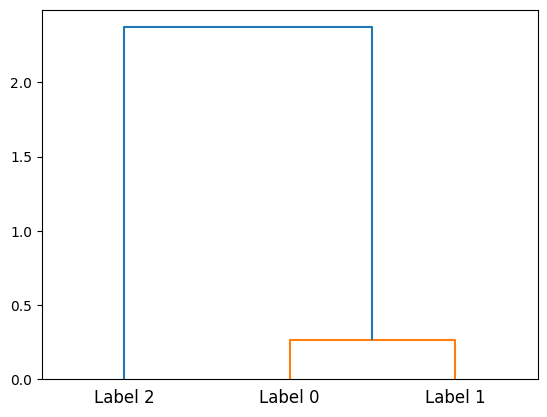

In [94]:
linkage_matrix = sch.linkage(corr_matrix, method="ward")

dendrogram = sch.dendrogram(linkage_matrix, labels=[f'Label {i}' for i in range( corr_matrix.shape[0])])
